# MSc Project : Extending to lat-lon

### Using 2019 Monsoon season (JJAS) - Temp (at 2m) and Precipitaion (TRMM/GPM data) to find a relation b/w ERRs and maximum temperature.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import netCDF4
# import pandas as pd
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
from dask.distributed import Client, Variable
%matplotlib inline

In [2]:
from functions import ccplot, binning

In [3]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu', cmap_sequential='Greens')

In [5]:
# ds_comb.to_netcdf('./data/combined/ds_comb.nc')
ds_comb = xr.open_dataset('./data/combined/ds_comb.nc')

In [6]:
ds_comb

<xarray.Dataset>
Dimensions:           (lon: 181, lat: 141, time: 2928)
Coordinates:
  * lon               (lon) float64 50.0 50.25 50.5 50.75 ... 94.5 94.75 95.0
  * lat               (lat) float64 5.0 5.25 5.5 5.75 ... 39.25 39.5 39.75 40.0
  * time              (time) datetime64[ns] 2019-06-01 ... 2019-09-30T23:00:00
Data variables:
    precipitationCal  (time, lat, lon) float32 ...
    t2m               (time, lat, lon) float32 ...
    d2m               (time, lat, lon) float32 ...

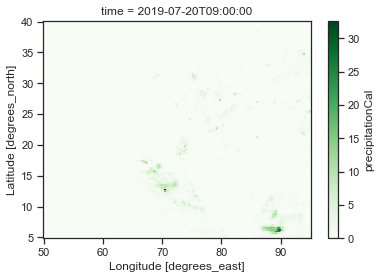

In [7]:
ds_comb.precipitationCal.sel(time = "2019-07-20 09:00:00").plot()

In [9]:
client = Client()

In [49]:
ccscale99_t2m = binning.get_binned_3d(ds_comb.sel(lat = slice(12,14), lon = slice(68,70)), min=1, percentile_val=0.99, var = "t2m", var_bin="t2m_bins", bin_nr=12)

In [52]:
ccscale99_d2m = binning.get_binned_3d(ds_comb.sel(lat = slice(12,14), lon = slice(68,70)), min=1, percentile_val=0.99, var = "d2m", var_bin="d2m_bins", bin_nr=12)

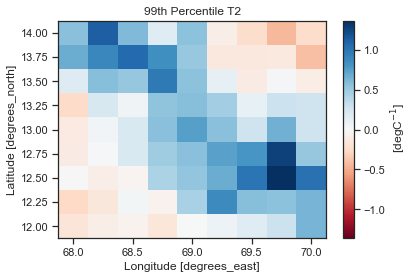

In [59]:
# fig, ax = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
ax.set_extent([68, 70, 12, 14], crs=ccrs.Mercator())
ccscale99_t2m.plot()
gridliner = ax.gridlines(crs=ccrs.Mercator())
# gridliner.top_labels = False
# gridliner.bottom_labels = True
# gridliner.left_labels = True
# gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

plt.title('99th Percentile T2')

plt.savefig('./images/ccscale99_t2m.pdf', dpi=300)

# fig.tight_layout()

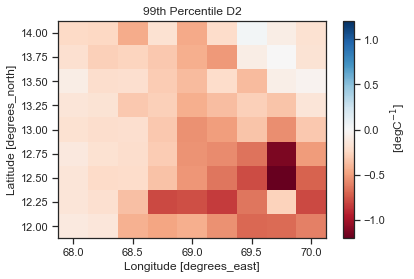

In [60]:
# fig, ax = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
ax.set_extent([68, 70, 12, 14], crs=ccrs.Mercator())
ccscale99_d2m.plot()
gridliner = ax.gridlines(crs=ccrs.Mercator())
# gridliner.top_labels = False
# gridliner.bottom_labels = True
# gridliner.left_labels = True
# gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

plt.title('99th Percentile D2')

plt.savefig('./images/ccscale99_d2m.pdf', dpi=300)

# fig.tight_layout()

In [54]:
ccscale50_t2m = binning.get_binned_3d(ds_comb.sel(lat = slice(12,14), lon = slice(68,70)), min=1, percentile_val=0.50, var = "t2m", var_bin="t2m_bins", bin_nr=12)

In [55]:
ccscale50_d2m = binning.get_binned_3d(ds_comb.sel(lat = slice(12,14), lon = slice(68,70)), min=1, percentile_val=0.50, var = "d2m", var_bin="d2m_bins", bin_nr=12)

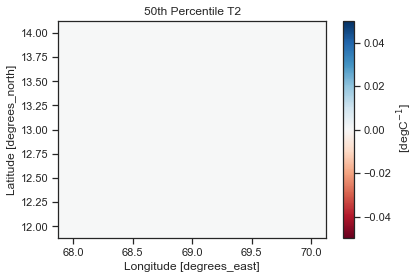

In [61]:
# fig, ax = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
ax.set_extent([68, 70, 12, 14], crs=ccrs.Mercator())
ccscale50_t2m.plot(cmap = "RdBu")
gridliner = ax.gridlines(crs=ccrs.Mercator())
# gridliner.top_labels = False
# gridliner.bottom_labels = True
# gridliner.left_labels = True
# gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

plt.title('50th Percentile T2')

plt.savefig('./images/ccscale50_t2m.pdf', dpi=300)

# fig.tight_layout()

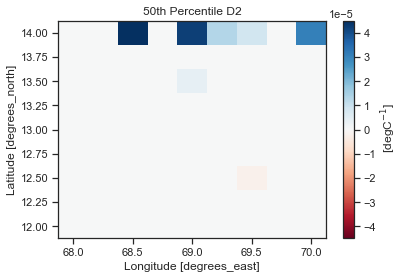

In [62]:
# fig, ax = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
ax.set_extent([68, 70, 12, 14], crs=ccrs.Mercator())
ccscale50_d2m.plot()
gridliner = ax.gridlines(crs=ccrs.Mercator())
# gridliner.top_labels = False
# gridliner.bottom_labels = True
# gridliner.left_labels = True
# gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

plt.title('50th Percentile D2')

plt.savefig('./images/ccscale50_d2m.pdf', dpi=300)

# fig.tight_layout()

### Ignore the code from here (just here for my reference)

In [63]:
# precip = ds_comb.precipitationCal
# t2m = ds_comb
# d2m = ds_comb

In [64]:
# # Set values less than 5 mm/hr to nan

# precip = xr.where(precip < 1, np.nan, precip)
# t2m = t2m.where(precip != np.nan)
# d2m = d2m.where(precip != np.nan)

In [65]:
# ds_comb = xr.merge([precip, t2m, d2m]).chunk(dict(time=-1))
# ds_comb

In [66]:
# # util function to determing the number of bins
# def equalObs(x, nbin):
#     nlen = len(x)
#     return np.interp(np.linspace(0, nlen, nbin + 1),
#                      np.arange(nlen),
#                      np.sort(x, axis= None))

# #-----------------------------------------------------#

# # Using function

# # get binned data
# def get_binned(ds, percentile_val = 0.99, var = "t2m", bins = None, bin_nr = 12):
#     if bins == None:
#         #create histogram with equal-frequency bins
#         # n, bins, patches = plt.hist(ds[var], equalObs(ds[var], bin_nr))
#         # plt.show()
#         bins = equalObs(ds[var], bin_nr)
#     else:
#         bins = np.array(bins)

#     binned_ds = ds.groupby_bins(ds[var], bins).quantile(percentile_val, interpolation = 'midpoint')
#     return binned_ds


In [67]:
# precip = ds_comb.precipitationCal.to_numpy()
# t2m = ds_comb.t2m.to_numpy()
# d2m = ds_comb.d2m.to_numpy()

In [68]:
# t2m.shape

In [69]:
# bins = np.apply_along_axis(equalObs, 0, t2m, 12)

In [70]:
# bins.shape

In [71]:
# binned_ds = np.zeros((len(bins[0]), len(bins[0][0])))

# for lat in range(len(bins[0])):
#     for lon in range(len(bins[0][0])):
#         y = ds_comb.isel(lat = lat, lon = lon).groupby_bins(ds_comb.t2m.isel(lat = lat, lon = lon), bins[:, lat, lon]).quantile(0.99, interpolation='midpoint')
        
#         bin_array = y.coords['t2m_bins'].to_numpy()
#         bin_mids = []

#         for i in range(0, len(bin_array)):
#             bin_mid = (bin_array[i].left + bin_array[i].right)*0.5
#             bin_mids.append(bin_mid)

#         mids = np.array(bin_mids)
        
#         if np.isnan(np.sum(y.precipitationCal.to_numpy())):
#             slope = np.nan
#         else:
#             slope = np.polyfit(mids, y.precipitationCal.to_numpy(), 1)[0]
        
#         binned_ds[lat, lon] = binned_ds[lat, lon] + slope

In [72]:
# y = ds_comb.isel(lat = 58, lon = 90).groupby_bins(ds_comb.t2m.isel(lat = 58, lon = 90), bins[:, 58, 90]).quantile(0.99, interpolation='midpoint')

# bin_array = y.coords['t2m_bins'].to_numpy()
# bin_mids = []

# for i in range(0, len(bin_array)):
#     bin_mid = (bin_array[i].left + bin_array[i].right)*0.5
#     bin_mids.append(bin_mid)

# mids = np.array(bin_mids)

# np.polyfit(mids, y.precipitationCal.to_numpy(), 1)[0]

In [73]:
# y = ds_comb.isel(lat = 10, lon = 10).groupby_bins(ds_comb.t2m.isel(lat = 10, lon = 10), bins[:, 10, 10]).quantile(0.99, interpolation='midpoint')

# bin_array = y.coords['t2m_bins'].to_numpy()
# bin_mids = []

# for i in range(0, len(bin_array)):
#     bin_mid = (bin_array[i].left + bin_array[i].right)*0.5
#     bin_mids.append(bin_mid)

# mids = np.array(bin_mids)

# if np.isnan(np.sum(y.precipitationCal.to_numpy())):
#     slope = np.nan
# else:
#     slope =  np.polyfit(mids, y.precipitationCal.to_numpy(), 1)[0]

In [74]:
# binned_ds

In [75]:
# ccscale = xr.DataArray(binned_ds, dims=("lat", "lon"), coords={"lat": ds_comb.coords['lat'], "lon": ds_comb.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

In [76]:
# ccscale.plot(cmap = "bwr")

In [77]:
# ccscale